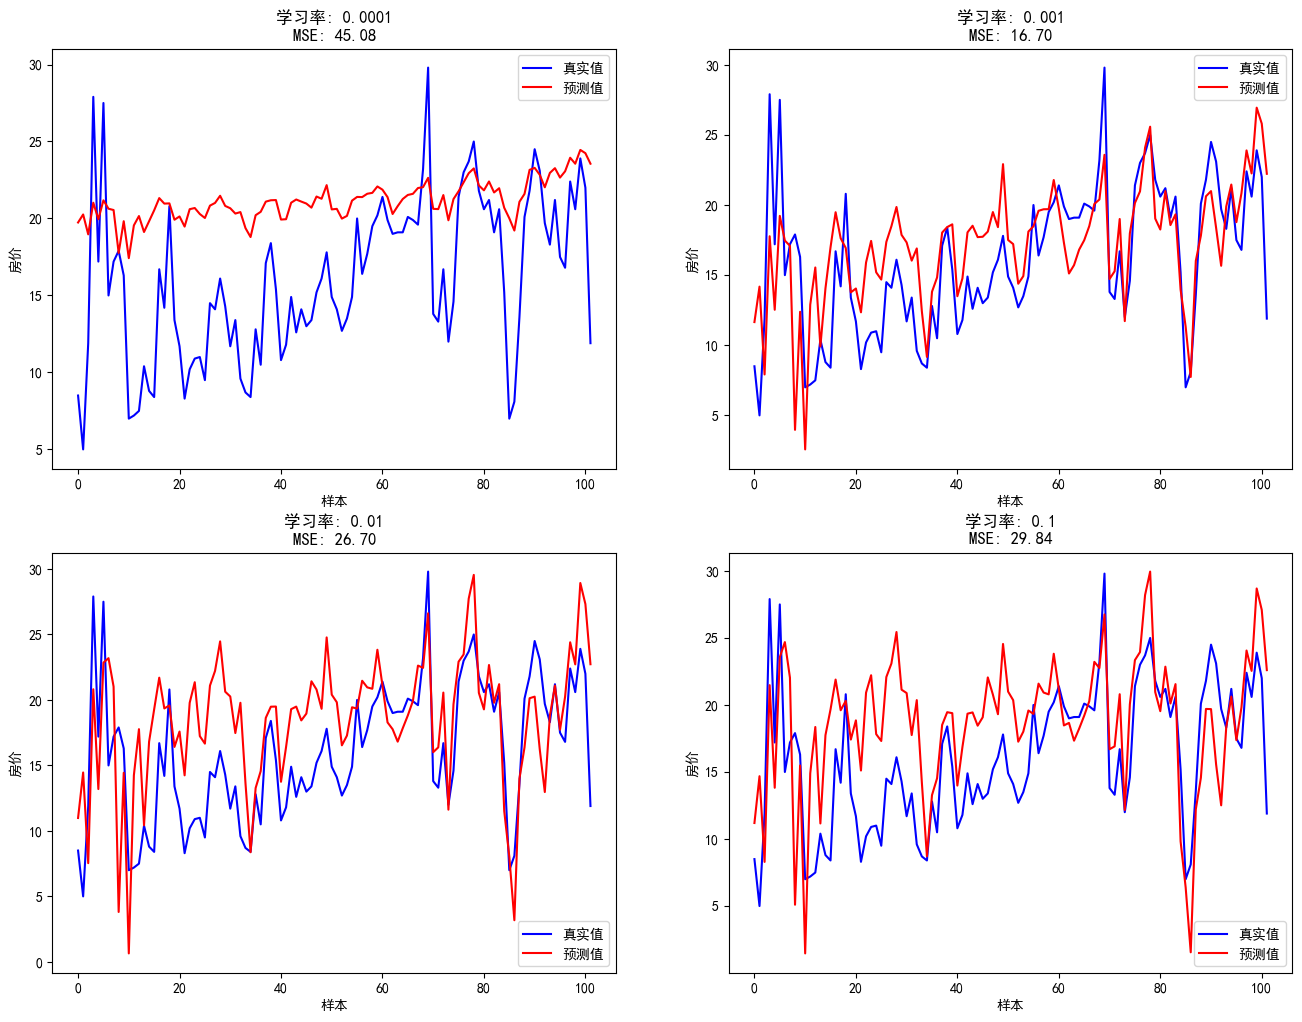

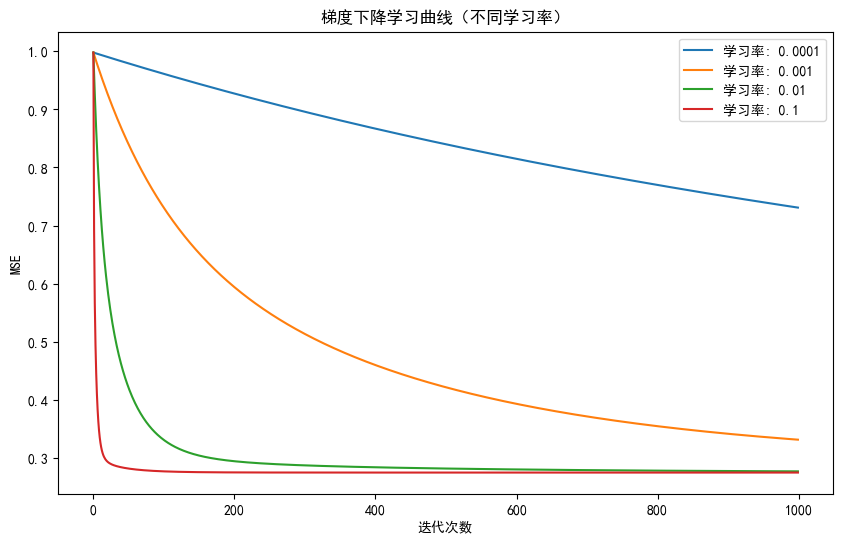

In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.animation import FuncAnimation

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

boston = pd.read_csv("D:\code\大三课程\机器学习\实验\实验一\实验一\\boston_house_prices.csv")
X = boston.iloc[:,1:13]
y = boston['MEDV']

# print(boston.info())

# 计算分割点
split_point = int(0.8 * len(X))

# 手动分割数据
X_train = X[:split_point]
y_train = y[:split_point]
X_test = X[split_point:]
y_test = y[split_point:]

# 标准化数据
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

mean2 = y_train.mean(axis=0)
std2 = y_train.std(axis=0)
y_train = (y_train - mean2) / std2

# 梯度下降函数
def gradient_descent(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights)

        gradient = (1/n_samples) * np.dot(X.T, (y_pred - y))
        weights -= learning_rate * gradient
        mse = np.mean((y_pred - y) ** 2)
        mse_history.append(mse)
    return weights, mse_history

# 不同学习率
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 1000

# 创建一个大图，包含四个子图
plt.figure(figsize=(16, 12))

for i, learning_rate in enumerate(learning_rates):
    # 进行梯度下降
    weights, mse_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)
    
    # 在测试集上进行预测
    y_pred = np.dot(X_test, weights) * std2 + mean2

    # 计算并显示MSE
    mse = np.mean((y_pred - y_test) ** 2)
    mse_str = f'MSE: {mse:.2f}'

    # 子图的位置（修正）
    plt.subplot(2, 2, i + 1)

    # 绘制测试数据的预测值和真实值的趋势图
    plt.plot(y_test.values, label='真实值', color='blue')
    plt.plot(y_pred, label='预测值', color='red')
    plt.xlabel('样本')
    plt.ylabel('房价')
    plt.title(f'学习率: {learning_rate}\n{mse_str}')
    plt.legend()


# 可视化梯度下降过程
plt.figure(figsize=(10, 6))
for learning_rate in learning_rates:
    _, mse_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)
    plt.plot(range(num_iterations), mse_history, label=f'学习率: {learning_rate}')

plt.xlabel('迭代次数')
plt.ylabel('MSE')
plt.title('梯度下降学习曲线（不同学习率）')
plt.legend()
plt.show()

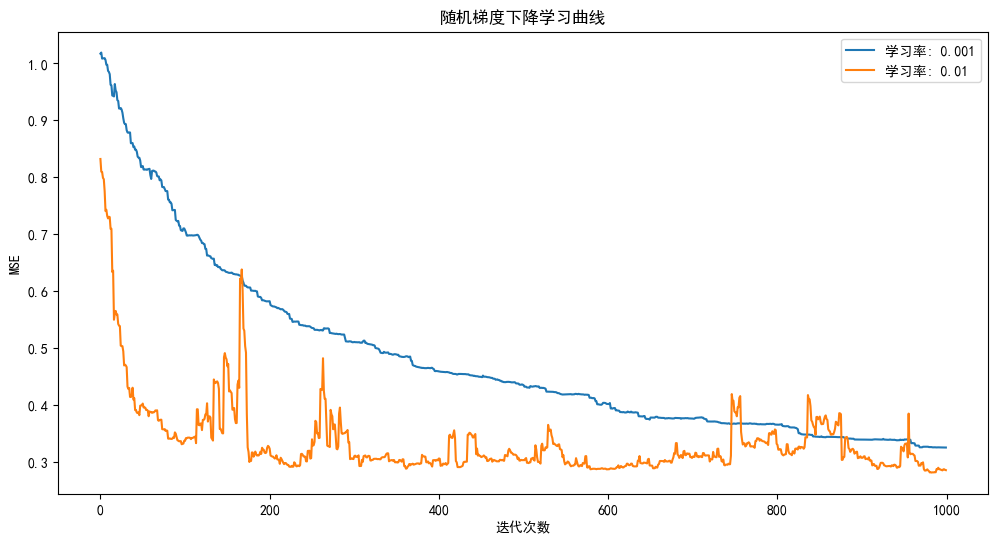

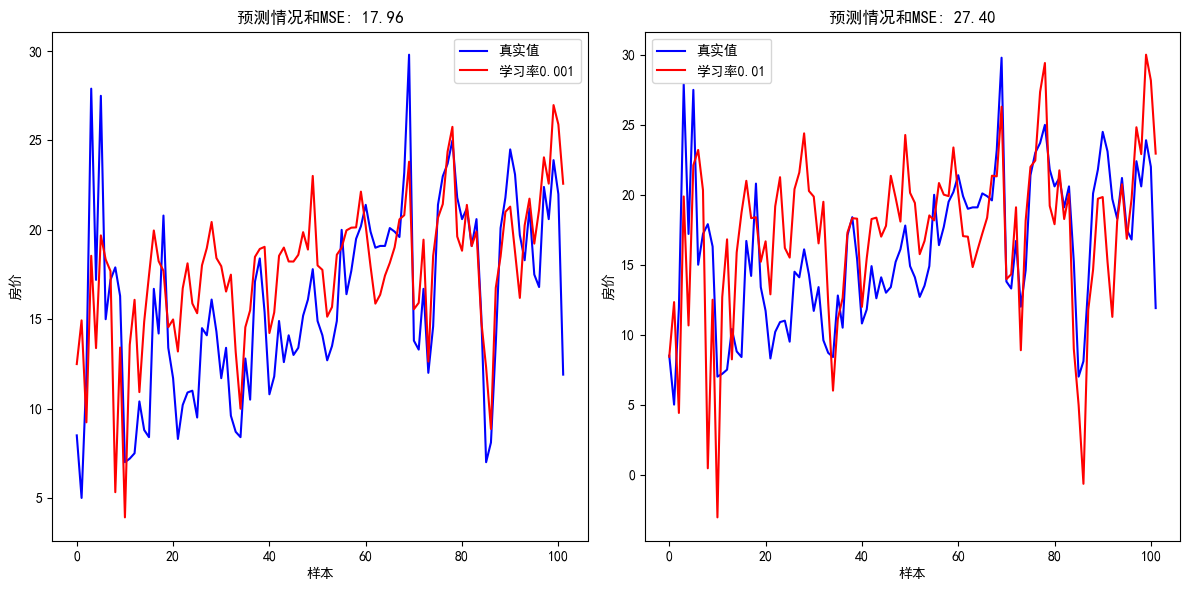

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

# 载入波士顿数据集
boston = pd.read_csv("D:\code\大三课程\机器学习\实验\实验一\实验一\\boston_house_prices.csv")

# 获取特征和标签
X = boston.iloc[:, 1:13]
y = boston['MEDV']

# 计算分割点
split_point = int(0.8 * len(X))

# 手动分割数据
X_train = X.iloc[:split_point, :]
y_train = y.iloc[:split_point]
X_test = X.iloc[split_point:, :]
y_test = y.iloc[split_point:]

# 标准化数据
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

mean2 = y_train.mean()
std2 = y_train.std()
y_train = (y_train - mean2) / std2

# 随机梯度下降函数
def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    mse_history = []

    for _ in range(num_iterations):
        # 随机选择一个样本
        index = np.random.randint(n_samples)
        X_sample = X.iloc[index, :]
        y_sample = y.iloc[index]

        y_pred = np.dot(X_sample, weights)
        gradient = -(y_sample - y_pred) * X_sample
        weights -= learning_rate * gradient
        mse = np.mean((np.dot(X, weights) - y) ** 2)  # 计算整个数据集的MSE
        mse_history.append(mse)

    return weights, mse_history

# 不同学习率
learning_rates = [0.001, 0.01]

# 绘制随机梯度下降的学习曲线
plt.figure(figsize=(12, 6))
for learning_rate in learning_rates:
    # 进行随机梯度下降
    weights, mse_history = stochastic_gradient_descent(X_train, y_train, learning_rate, num_iterations=1000)
    plt.plot(range(len(mse_history)), mse_history, label=f'学习率: {learning_rate}')

# 设置标题和标签
plt.title('随机梯度下降学习曲线')
plt.xlabel('迭代次数')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 用于存储预测结果的字典
prediction_results = {}

# 用于存储MSE的列表
mse_results = []

# 绘制预测情况和MSE
for learning_rate in learning_rates:
    # 进行随机梯度下降
    weights, _ = stochastic_gradient_descent(X_train, y_train, learning_rate, num_iterations=1000)
    
    # 在测试集上进行预测
    y_pred = (np.dot(X_test, weights) * std2) + mean2
    prediction_results[f'学习率{learning_rate}'] = y_pred
    
    # 计算MSE并存储
    mse = np.mean((y_pred - y_test) ** 2)
    mse_results.append(mse)

# 创建两个子图用于显示预测情况和MSE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.ravel()
for i, (label, prediction) in enumerate(prediction_results.items()):
    axes[i].plot(y_test.values, label='真实值', color='blue')
    axes[i].plot(prediction, label=label,color='red')
    axes[i].set_xlabel('样本')
    axes[i].set_ylabel('房价')
    axes[i].set_title(f'预测情况和MSE: {mse_results[i]:.2f}')
    axes[i].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图
plt.show()
